# Name : Adwaiy Singh
# Reg. No. : 220968424
# Sec. : A
# Batch : 2

# Week 11

## Use the Taxi v2 environment:
#### https://www.gymlibrary.dev/environments/toy_text/taxi/

#### Learn the policy using the following algorithms (Let parameters α = 0.4, γ=  0.9, Ɛ= 0.9):
    1. SARSA
    2. Expected SARSA

#### Plot the episode vs. reward graph, compare, and comment on the performance of the three algorithms for 2000 episodes.

##### Imports

In [1]:
import numpy as np
import gymnasium as gym
import random
from collections import defaultdict
import matplotlib.pyplot as plt

##### Paramaters

In [2]:
alpha = 0.4
gamma = 0.9
epsilon = 0.1  # Using 0.1 instead of 0.9 because for the Taxi-v3 Gym environment, the agent only gets -200 rewards
episodes = 2000

##### Def. policy (epsilon greedy)

In [3]:
def epsilon_greedy_policy(Q, state, nA, epsilon):
    if random.random() < epsilon:
        return random.randint(0, nA - 1)
    else:
        return np.argmax(Q[state])

##### SARSA (on-policy TD Control)

In [4]:
def sarsa(env):
    Q = defaultdict(lambda: np.full(env.action_space.n, 1./env.action_space.n))

    for ep in range(episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)

        done = False
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_action = epsilon_greedy_policy(Q, next_state, env.action_space.n, epsilon)

            td_target = reward + gamma * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            state = next_state
            action = next_action
    return Q

##### Expected SARSA

In [5]:
def expected_sarsa(env):
    Q = defaultdict(lambda: np.full(env.action_space.n, 1./env.action_space.n))

    for ep in range(episodes):
        state, _ = env.reset()
        done = False

        while not done:
            action = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            policy_probs = np.ones(env.action_space.n) * (epsilon / env.action_space.n)
            best_action = np.argmax(Q[next_state])
            policy_probs[best_action] += (1.0 - epsilon)

            expected_value = np.dot(Q[next_state], policy_probs)

            td_target = reward + gamma * expected_value
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            state = next_state
    return Q

##### Run Taxi

In [6]:
env = gym.make("Taxi-v3")

In [7]:
print("Training with SARSA...")
Q_sarsa = sarsa(env)

Training with SARSA...


In [8]:
print("Training with Expected SARSA...")
Q_expected = expected_sarsa(env)

Training with Expected SARSA...


##### Testing agents

In [9]:
def test_agent(Q, env):
    rewards = []
    
    for ep in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        
        while not done:
            action = np.argmax(Q[state])
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            
        rewards.append(total_reward)

        if (ep+1)%100 == 0:
            print(f"Episode {ep + 1}, total reward: {total_reward}")
    return rewards

In [10]:
print("Testing SARSA policy:\n")
sarsa_rewards = test_agent(Q_sarsa, env)

Testing SARSA policy:

Episode 100, total reward: 2
Episode 200, total reward: 9
Episode 300, total reward: 6
Episode 400, total reward: -200
Episode 500, total reward: 9
Episode 600, total reward: 7
Episode 700, total reward: 3
Episode 800, total reward: 11
Episode 900, total reward: -200
Episode 1000, total reward: 13
Episode 1100, total reward: 3
Episode 1200, total reward: 2
Episode 1300, total reward: 5
Episode 1400, total reward: -200
Episode 1500, total reward: 2
Episode 1600, total reward: 2
Episode 1700, total reward: 4
Episode 1800, total reward: 8
Episode 1900, total reward: 7
Episode 2000, total reward: 7


In [11]:
print("Testing Expected SARSA policy:\n")
expected_sarsa_rewards = test_agent(Q_expected, env)

Testing Expected SARSA policy:

Episode 100, total reward: 5
Episode 200, total reward: -200
Episode 300, total reward: 10
Episode 400, total reward: 5
Episode 500, total reward: 6
Episode 600, total reward: 9
Episode 700, total reward: 6
Episode 800, total reward: 8
Episode 900, total reward: 9
Episode 1000, total reward: 2
Episode 1100, total reward: 7
Episode 1200, total reward: 12
Episode 1300, total reward: 10
Episode 1400, total reward: 7
Episode 1500, total reward: 9
Episode 1600, total reward: 6
Episode 1700, total reward: 6
Episode 1800, total reward: 5
Episode 1900, total reward: 14
Episode 2000, total reward: 12


##### Plot graph and comparision

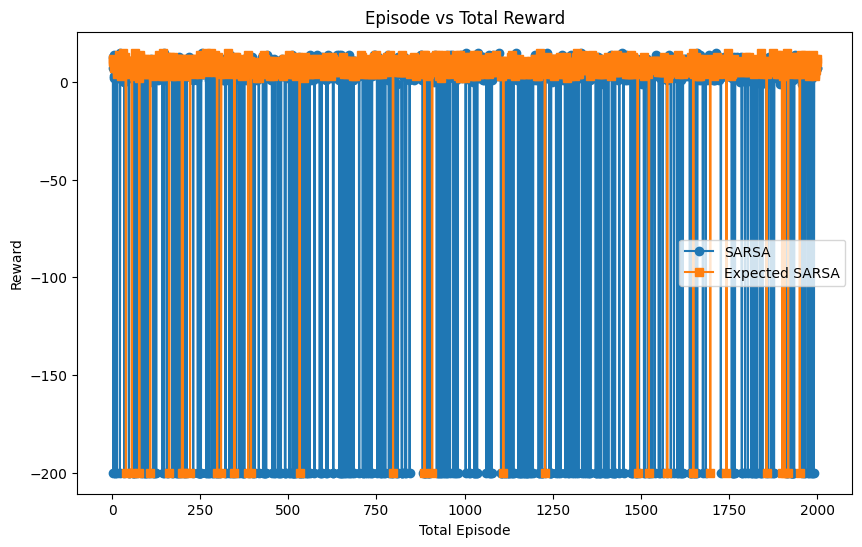

In [12]:
ep = list(range(1, episodes+1))
plt.figure(figsize=(10, 6))

plt.plot(ep, sarsa_rewards, marker='o', label='SARSA')
plt.plot(ep, expected_sarsa_rewards, marker='s', label='Expected SARSA')

plt.title('Episode vs Total Reward')
plt.xlabel('Total Episode')
plt.ylabel('Reward')

plt.xticks(range(0, episodes+1, 250))
plt.legend()
plt.show()

#### Bad graph for total rewards, making differnt one for average rewards instead

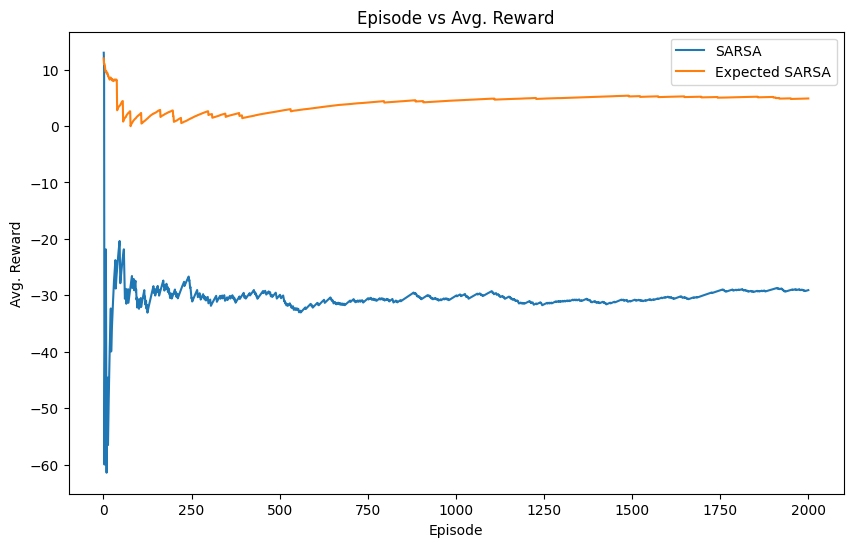

In [13]:
sarsa_avg_rewards = np.cumsum(sarsa_rewards) / np.arange(1, episodes + 1)
expected_sarsa_avg_rewards = np.cumsum(expected_sarsa_rewards) / np.arange(1, episodes + 1)

plt.figure(figsize=(10, 6))

plt.plot(ep, sarsa_avg_rewards, label='SARSA')
plt.plot(ep, expected_sarsa_avg_rewards, label='Expected SARSA')

plt.title('Episode vs Avg. Reward')
plt.xlabel('Episode')
plt.ylabel('Avg. Reward')

plt.xticks(range(0, episodes+1, 250))
plt.legend()
plt.show()

In [14]:
sarsa_avg = sum(sarsa_rewards) / len(sarsa_rewards)
expected_avg = sum(expected_sarsa_rewards) / len(expected_sarsa_rewards)

print(f"Average reward (SARSA): {sarsa_avg:.2f}")
print(f"Average reward (Expected SARSA): {expected_avg:.2f}")

Average reward (SARSA): -29.08
Average reward (Expected SARSA): 4.89


#### Conclusion

**Expected SARSA outperforms SARSA** in the Taxi-v3 environment, achieving a positive average reward of 4.89 compared to SARSA's negative reward of -29.08. The better performance of Expected SARSA can be attributed to its use of the **expected value of future actions**, which leads to a more **stable and effective policy**. In contrast, SARSA's reliance on the **actual next action** taken may result in **suboptimal decision-making**, leading to **poorer performance**. Therefore, Expected SARSA is a more efficient algorithm in this scenario.

In [15]:
epsilon_start = 0.9
epsilon_min = 0.1
epsilon_decay = 0.999
max_steps = 200

##### SARSA (with epsilon decay)

In [16]:
def sarsa_epdecay(env):
    Q = defaultdict(lambda: np.full(env.action_space.n, 1./env.action_space.n))
    eps = epsilon
    
    for ep in range(episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, env.action_space.n, eps)

        done = False
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_action = epsilon_greedy_policy(Q, next_state, env.action_space.n, eps)

            td_target = reward + gamma * Q[next_state][next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta

            state = next_state
            action = next_action

        eps = max(0.1, eps * 0.999)
    return Q

##### Expected SARSA (with epsilon decay)

In [17]:
def expected_sarsa_epdecay(env):
    Q = defaultdict(lambda: np.full(env.action_space.n, 1./env.action_space.n))
    epsilon = epsilon_start
    
    for ep in range(episodes):
        state, _ = env.reset()
        done = False
        steps = 0

        while not done and steps < max_steps:
            action = epsilon_greedy_policy(Q, state, env.action_space.n, epsilon)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            probs = np.ones(env.action_space.n) * (epsilon / env.action_space.n)
            best_action = np.argmax(Q[next_state])
            probs[best_action] += (1.0 - epsilon)

            expected_q = np.dot(Q[next_state], probs)
            Q[state][action] += alpha * (reward + gamma * expected_q - Q[state][action])

            state = next_state
            steps += 1

        epsilon = max(epsilon_min, epsilon * epsilon_decay)
    return Q

In [18]:
print("Training with SARSA (epsilon decay)...")
Q_sarsa_epdecay = sarsa_epdecay(env)

Training with SARSA (epsilon decay)...


In [19]:
print("Training with Expected SARSA (epsilon decay)...")
Q_expected_epdecay = expected_sarsa_epdecay(env)

Training with Expected SARSA (epsilon decay)...


In [20]:
print("Testing SARSA policy (epsilon decay):\n")
sarsa_rewards_epdecay = test_agent(Q_sarsa, env)

Testing SARSA policy (epsilon decay):

Episode 100, total reward: 3
Episode 200, total reward: 6
Episode 300, total reward: 11
Episode 400, total reward: 7
Episode 500, total reward: 10
Episode 600, total reward: 7
Episode 700, total reward: 3
Episode 800, total reward: 3
Episode 900, total reward: 7
Episode 1000, total reward: 14
Episode 1100, total reward: 3
Episode 1200, total reward: 8
Episode 1300, total reward: 12
Episode 1400, total reward: 14
Episode 1500, total reward: 8
Episode 1600, total reward: 7
Episode 1700, total reward: 8
Episode 1800, total reward: 9
Episode 1900, total reward: -200
Episode 2000, total reward: 3


In [21]:
print("Testing Expected SARSA policy  (epsilon decay):\n")
expected_sarsa_rewards_epdecay = test_agent(Q_expected, env)

Testing Expected SARSA policy  (epsilon decay):

Episode 100, total reward: 4
Episode 200, total reward: 6
Episode 300, total reward: 8
Episode 400, total reward: 6
Episode 500, total reward: 5
Episode 600, total reward: 8
Episode 700, total reward: 6
Episode 800, total reward: 7
Episode 900, total reward: 7
Episode 1000, total reward: 3
Episode 1100, total reward: 8
Episode 1200, total reward: 8
Episode 1300, total reward: 8
Episode 1400, total reward: 9
Episode 1500, total reward: 5
Episode 1600, total reward: 11
Episode 1700, total reward: 7
Episode 1800, total reward: 7
Episode 1900, total reward: 11
Episode 2000, total reward: 6


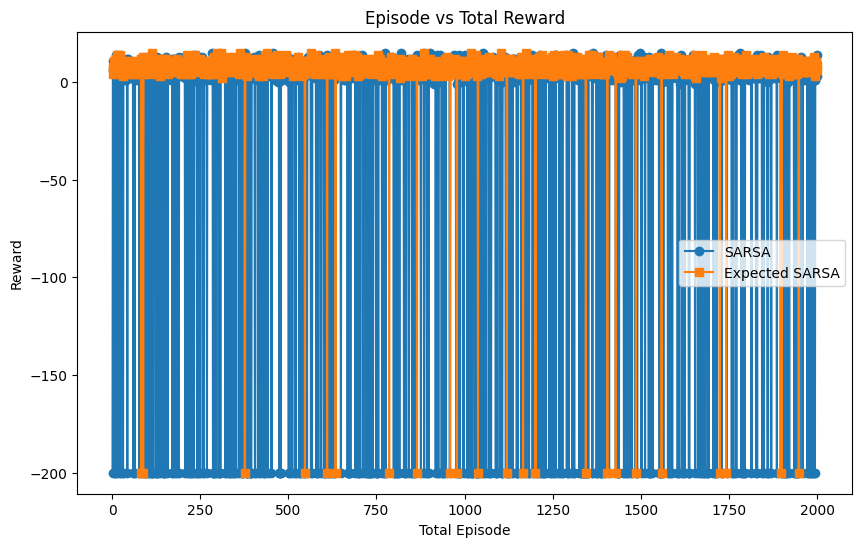

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(ep, sarsa_rewards_epdecay, marker='o', label='SARSA')
plt.plot(ep, expected_sarsa_rewards_epdecay, marker='s', label='Expected SARSA')

plt.title('Episode vs Total Reward')
plt.xlabel('Total Episode')
plt.ylabel('Reward')

plt.xticks(range(0, episodes+1, 250))
plt.legend()
plt.show()

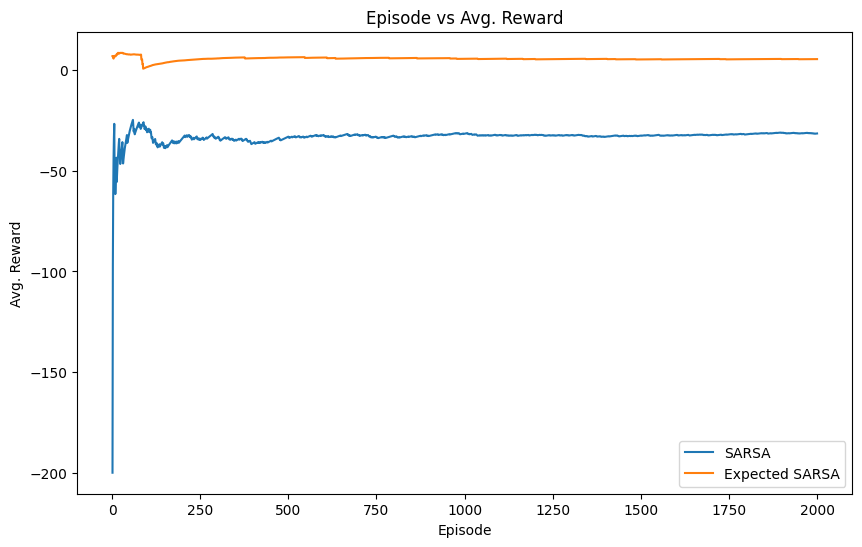

In [23]:
sarsa_avg_rewards_epdecay = np.cumsum(sarsa_rewards_epdecay) / np.arange(1, episodes + 1)
expected_sarsa_avg_rewards_epdecay = np.cumsum(expected_sarsa_rewards_epdecay) / np.arange(1, episodes + 1)

plt.figure(figsize=(10, 6))

plt.plot(ep, sarsa_avg_rewards_epdecay, label='SARSA')
plt.plot(ep, expected_sarsa_avg_rewards_epdecay, label='Expected SARSA')

plt.title('Episode vs Avg. Reward')
plt.xlabel('Episode')
plt.ylabel('Avg. Reward')

plt.xticks(range(0, episodes+1, 250))
plt.legend()
plt.show()

In [24]:
sarsa_avg_epdecay = sum(sarsa_rewards_epdecay) / len(sarsa_rewards_epdecay)
expected_avg_epdecay = sum(expected_sarsa_rewards_epdecay) / len(expected_sarsa_rewards_epdecay)

print(f"Average reward, SARSA (with epsilon decay): {sarsa_avg_epdecay:.2f}")
print(f"Average reward, Expected SARSA (with epsilon decay): {expected_avg_epdecay:.2f}")

Average reward, SARSA (with epsilon decay): -31.45
Average reward, Expected SARSA (with epsilon decay): 5.49


#### Conclusion

Even with epsilon decay, **Expected SARSA continues to outperform SARSA** in the Taxi-v3 environment, achieving a positive average reward of 5.49 compared to SARSA's negative reward of -31.45. While both algorithms **benefit from reduced exploration** over time (due to epsilon decay), Expected SARSA's use of the expected value of future actions leads to more stable and effective decision-making, resulting in better overall performance. In contrast, SARSA's performance remains suboptimal, likely due to its reliance on the actual actions taken, which can lead to less optimal choices and poorer rewards. Thus, **Expected SARSA remains the more efficient algorithm** in this scenario.